In [32]:
# %load scal.py
#!/usr/bin/env python3
"""
Created on Fri Apr  5 15:18:41 2019

@author: zhujingyao
"""
###############################################################
# transform data to ddataframe and combine two tables
###############################################################
f= open("train.txt","rb")
text = f.read().decode(errors='replace') # read file
import re
text1 = text.replace('20030006121','',1) #remove first num
text2 =re.split('\n\d{11}\s\s\s',text1) #use other num as tag to split
import pandas as pd
data = pd.DataFrame()
df1 =pd.DataFrame(text2) #dataframe1
df2 = pd.read_csv('label.txt',sep='\s+',header=None) #dataframe2
df = pd.concat([df1,df2],axis=1,ignore_index=True)
df[[df.index[0],df.index[1]]] = df[[df.index[1],df.index[0]]]
df.columns = ["Patent_No","Description","Category"]
data = df


In [33]:
data.head()

,Patent_No,Description,Category
0,20030006121,Passive radio frequency identification sys...,8
1,20030009666,Methods and apparatus for efficient computati...,0
2,20030014337,"Systems, methods and computer program product...",8
3,20030019942,System and method for electronically readable...,8
4,20030033242,System and method for automated process of de...,6


In [34]:
print(data['Category'].value_counts())  ## unbalanced but not significantly!!

0    274
8    228
1     84
2     77
3     61
6     45
5     42
4     37
7     34
Name: Category, dtype: int64


In [35]:
data.dtypes

Patent_No       int64
Description    object
Category        int64
dtype: object

In [37]:
###############################################################
# text processing
###############################################################
import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
data['word'] = data['Description'].str.lower()  ### lowercase
data.head()

,Patent_No,Description,Category,word
0,20030006121,Passive radio frequency identification sys...,8,passive radio frequency identification sys...
1,20030009666,Methods and apparatus for efficient computati...,0,methods and apparatus for efficient computati...
2,20030014337,"Systems, methods and computer program product...",8,"systems, methods and computer program product..."
3,20030019942,System and method for electronically readable...,8,system and method for electronically readable...
4,20030033242,System and method for automated process of de...,6,system and method for automated process of de...


In [38]:
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
data['word'] =data['word'].apply(tokenizer.tokenize) ### tokenize the words and remove punctuation
data.head()

,Patent_No,Description,Category,word
0,20030006121,Passive radio frequency identification sys...,8,"[passive, radio, frequency, identification, sy..."
1,20030009666,Methods and apparatus for efficient computati...,0,"[methods, and, apparatus, for, efficient, comp..."
2,20030014337,"Systems, methods and computer program product...",8,"[systems, methods, and, computer, program, pro..."
3,20030019942,System and method for electronically readable...,8,"[system, and, method, for, electronically, rea..."
4,20030033242,System and method for automated process of de...,6,"[system, and, method, for, automated, process,..."


In [14]:
## I think to make sense of words, it is better we don't do stemming. The words loses its meaning !! 
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("english")
#data['word'] = data['word'].apply(lambda x: [stemmer.stem(y) for y in x]) ### stem the words
#data.head()

In [39]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['word'] = data['word'].apply(lambda x: [item for item in x if item not in stop]) ### remove the stop words
data.head()

,Patent_No,Description,Category,word
0,20030006121,Passive radio frequency identification sys...,8,"[passive, radio, frequency, identification, sy..."
1,20030009666,Methods and apparatus for efficient computati...,0,"[methods, apparatus, efficient, computation, o..."
2,20030014337,"Systems, methods and computer program product...",8,"[systems, methods, computer, program, products..."
3,20030019942,System and method for electronically readable...,8,"[system, method, electronically, readable, car..."
4,20030033242,System and method for automated process of de...,6,"[system, method, automated, process, deal, str..."


In [44]:
## Wanted to get this thing done using TFIDF

a_words = text.lower()
allWords = tokenizer.tokenize(a_words)
meaningful_words = [w for w in allWords if not w in stop]
###freqDist_allWords = nltk.FreqDist(meaningful_words)
allWordExceptStopDistwithstem = nltk.FreqDist([stemmer.stem(w) for w in meaningful_words])
mostCommon= allWordExceptStopDistwithstem.most_common(50)
#mostCommon = freqDist_allWords.most_common(50)
top_50_word_dic = dict(mostCommon)
top_50_word = list(top_50_word_dic.keys())  ### build top 50 words
print(top_50_word[0:10])
print('#####-------#####-------####')


['may', 'user', 'transact', 'system', 'data', 'devic', 'account', 'payment', 'use', 'one']
#####-------#####-------####


In [45]:
print([top_50_word_dic[x] for x in top_50_word[0:10]])

[165889, 96980, 94831, 90892, 80667, 80556, 76545, 73803, 71277, 69319]


<BarContainer object of 50 artists>

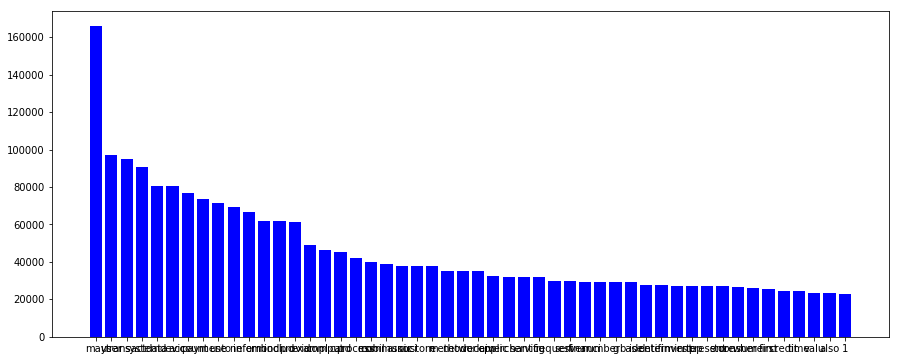

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.bar(list(top_50_word_dic.keys()), top_50_word_dic.values(), color='b')


In [47]:
data['word'] = data['word'].apply(lambda x: [item for item in x if item not in top_50_word])  ### Remove top 50 words



In [48]:
from sacremoses import MosesDetokenizer
detokenizer = MosesDetokenizer()
data['Map_Word'] = data['word'].apply(detokenizer.detokenize) # untokenize the words
data.head()

,Patent_No,Description,Category,word,Map_Word
0,20030006121,Passive radio frequency identification sys...,8,"[passive, radio, frequency, identification, id...",passive radio frequency identification identif...
1,20030009666,Methods and apparatus for efficient computati...,0,"[methods, apparatus, efficient, computation, w...",methods apparatus efficient computation way ch...
2,20030014337,"Systems, methods and computer program product...",8,"[systems, methods, computer, program, products...",systems methods computer program products perf...
3,20030019942,System and method for electronically readable...,8,"[electronically, readable, power, source, impr...",electronically readable power source improved ...
4,20030033242,System and method for automated process of de...,6,"[automated, deal, structuring, automated, deal...",automated deal structuring automated deal proc...


In [49]:
## Split the data into 'test' and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Map_Word'], df['Category'], test_size=0.20)

In [50]:
X_train.head()

358    financial preparedness tool methods systems re...
153    systems methods facilitating financial transac...
434    device delivering communications storing deliv...
146    usefulness novel divorce insurance annuity ins...
145    registering device verify transactions oriente...
Name: Map_Word, dtype: object

In [51]:
y_train.head()

358    6
153    5
434    0
146    8
145    1
Name: Category, dtype: int64

In [52]:
import spacy
#spacy.load('en')
spacy.load('en_core_web_sm')
from spacy.lang.en import English
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
parser = English()
from sklearn.feature_extraction.text import TfidfVectorizer

STOPWORDS = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS))
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', analyzer= 'word', min_df = 3)

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
def get_model_results(model_name,model,X_train,y_train,X_test,y_test):
    print('*********************************************')
    print('********** Processing Model %s **********' %(model_name))
    model_pipeline = Pipeline([('tfidf', vectorizer),
                         ('model', model)])

    text_clf = model_pipeline.fit(X_train, y_train)
    predicted = text_clf.predict(X_test)
    print('********** Prediction In Progress **********', '\n\n')
    print('*************** Results *******************')
    accuracy = accuracy_score(y_test, predicted)
    cf = pd.crosstab(y_test, predicted)
    print('Accuracy:', '\t', round((accuracy* 100), 3), '%')
    print('Confusion Matrix:', '\n', cf)
    print('*******************************************')
    predicted_df = pd.concat([pd.Series(X_test), pd.Series(y_test), pd.Series(predicted)], axis = 1)
    return(predicted_df, text_clf) 

In [63]:
## Ignoring the Future Warning
#import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [58]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model  = MultinomialNB()
NB_result_df  = get_model_results('Naive Bayes',model,X_train,y_train,X_test,y_test)

*********************************************
********** Processing Model Naive Bayes **********
********** Prediction In Progress ********** 


*************** Results *******************
Accuracy: 	 49.718 %
Confusion Matrix: 
 col_0      0  2  3  7   8
Category                 
0         51  0  0  0   5
1         13  0  0  0   9
2         10  2  0  0   4
3          3  0  6  0   0
4          7  0  0  0   1
5          0  0  0  0   9
6          1  0  0  0   7
7          3  0  0  4   1
8         16  0  0  0  25
*******************************************


In [61]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9)
KNN_result_df = get_model_results('K-NN',model,X_train,y_train,X_test,y_test)

*********************************************
********** Processing Model K-NN **********
********** Prediction In Progress ********** 


*************** Results *******************
Accuracy: 	 59.887 %
Confusion Matrix: 
 col_0      0  1   2  3  4  5  6  7   8
Category                              
0         32  4   7  1  1  2  1  1   7
1          3  6   6  1  1  0  0  0   5
2          0  0  14  0  0  0  0  0   2
3          0  0   0  6  0  0  0  0   3
4          0  0   0  0  8  0  0  0   0
5          0  0   0  0  0  7  0  0   2
6          0  0   0  1  0  0  3  0   4
7          1  0   0  0  0  0  1  6   0
8          6  0   5  4  0  0  2  0  24
*******************************************


In [64]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
RF_result_df = get_model_results('Random Forest',model,X_train,y_train,X_test,y_test)

*********************************************
********** Processing Model Random Forest **********
********** Prediction In Progress ********** 


*************** Results *******************
Accuracy: 	 48.588 %
Confusion Matrix: 
 col_0      0  1  2  3  4  5  6  7   8
Category                             
0         43  1  0  1  0  0  0  0  11
1         11  1  2  0  0  0  0  0   8
2          5  1  7  0  0  0  0  0   3
3          1  0  0  6  0  0  0  0   2
4          4  0  0  0  3  0  0  0   1
5          3  0  0  0  0  3  0  0   3
6          4  0  0  0  0  0  1  0   3
7          4  0  0  0  0  0  0  4   0
8         18  2  1  0  0  1  1  0  18
*******************************************


# Gradient Boosting  ## Giving me some error
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
GB_result_df = get_model_results('Gradient Boosting',model,X_train,y_train,X_test,y_test)

In [ ]:
# Linear SVM
from sklearn import svm
model = svm.svc(kernel='linear', c=1, gamma=1)  ## Change gamma = 0, to check
LSVM_result_df = get_model_results('SVM',model,X_train,y_train,X_test,y_test)

In [ ]:
# Non-Linear SVM
from sklearn import svm
model = svm.svc(kernel='rbf', c=1, gamma=1)
NLSVM_result_df = get_model_results('NSVM',model,X_train,y_train,X_test,y_test)

In [ ]:
# ADA boost
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
ADA_result_df = get_model_results('ADA boost',model,X_train,y_train,X_test,y_test)


###############################################################
# text processing
###############################################################
import nltk
nltk.download('punkt')
nltk.download('stopwords')
data['word'] = data[1].str.lower()  ### lowercase

tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
data['word'] =data['word'].apply(tokenizer.tokenize) ### tokenize the words and remove punctuation

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
data['word'] = data['word'].apply(lambda x: [stemmer.stem(y) for y in x]) ### stem the words

from nltk.corpus import stopwords
stop = stopwords.words('english')
data['word'] = data['word'].apply(lambda x: [item for item in x if item not in stop]) ### remove the stop words

a_words = text.lower()
allWords = tokenizer.tokenize(a_words)
meaningful_words = [w for w in allWords if not w in stop]
allWordExceptStopDistwithstem = nltk.FreqDist([stemmer.stem(w) for w in meaningful_words])
mostCommon= allWordExceptStopDistwithstem.most_common(50)
top_50_word_dic = dict(mostCommon)
top_50_word = list(top_50_word_dic.keys())  ### build top 50 words

data['word'] = data['word'].apply(lambda x: [item for item in x if item not in top_50_word])  ### Remove top 50 words

from sacremoses import MosesDetokenizer
detokenizer = MosesDetokenizer()
data['map_word'] = data['word'].apply(detokenizer.detokenize) # untokenize the words
